In [1]:
# Dependencies
import matplotlib.pyplot as plt
from citipy import citipy as cp
import pandas as pd
import requests as req
import json
import time

In [3]:
#from citipy, retrieve list of cities based on lat and long 
list_of_cities = []
counter = 0
Duplicates  = 'no'
starting_lat = -90
starting_lng = -180
while counter <= 1000:
    for x in range(-90,90,2):
        for y in range(-180,180,7):
            if counter > 1000: continue   
            city = cp.nearest_city(x, y)
            citdict = {}
            citdict['city'] = city.city_name
            citdict['country'] = city.country_code
            citdict['lat'] = x
            citdict['long'] = y
            if len(list_of_cities) == 0:
                list_of_cities.append(citdict)
                counter+=1
                continue
            else:
            #Get rid of duplicates
                for city in list_of_cities:
                    if city['city'] == citdict['city']:
                        Duplicates = 'yes'
            if Duplicates == 'no':
                list_of_cities.append(citdict)
                counter+=1
            else:
                Duplicates = 'no'

print(len(list_of_cities))  

1001


In [4]:
print(list_of_cities[0])

{'city': 'vaini', 'country': 'to', 'lat': -90, 'long': -180}


In [5]:
#Creating dataframe of 900 cities
cities_df = pd.DataFrame({
    'city': [x['city'] for x in list_of_cities],
    'country': [x['country'] for x in list_of_cities],
})

In [6]:
cities_sample = cities_df.sample(900)
cities_sample

,city,country
900,cordoba,es
500,timbangan,ph
612,grand-bourg,gp
486,ikom,ng
983,north bend,us
445,butaritari,ki
191,morondava,mg
147,filadelfia,py
640,codrington,ag
150,armacao dos buzios,br


In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?"
api_key = '7806ba238e6261a7592a464fdca9176b'

In [8]:
units = "Imperial"
count = 0
cities_sample['latitude'] = ""
cities_sample['longitude'] = ""
cities_sample['temperature'] = ""
cities_sample['humidity'] = ""
cities_sample['cloudiness'] = ""
cities_sample['wind_speed'] = ""

for index,row in cities_sample.iterrows():
    count+= 1
    query_url = url + "appid=" + api_key + "&units=" + units + "&q=" + row['city']
    try:
        weather_response = req.get(query_url)
        cityweather = weather_response.json()
#setting the values extracted for url
        cities_sample.set_value(index, "latitude", int(cityweather['coord']['lat']))
        cities_sample.set_value(index, "longitude", int(cityweather['coord']['lat']))
        cities_sample.set_value(index, "temperature", int(cityweather['main']['temp']))
        cities_sample.set_value(index, "humidity", int(cityweather['main']['humidity']))
        cities_sample.set_value(index, "cloudiness", int(cityweather['clouds']['all']))
        cities_sample.set_value(index, "wind_speed", int(cityweather['wind']['speed']))
    except:
        print(f"No data for this city: {row['city']}")
    print(f"This is city#: {count}")
    print(f"This is: {row['city']}" )
    print(f"This is the requested URL: {query_url}")

This is city#: 1
This is: cordoba
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=cordoba
No data for this city: timbangan
This is city#: 2
This is: timbangan
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=timbangan
This is city#: 3
This is: grand-bourg
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=grand-bourg
This is city#: 4
This is: ikom
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=ikom
This is city#: 5
This is: north bend
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=north bend
This is city#: 6
This is: butaritari
This is the requested URL: http://api.openweathermap.org/d

This is city#: 47
This is: puerto ayacucho
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=puerto ayacucho
This is city#: 48
This is: aswan
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=aswan
This is city#: 49
This is: chicama
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=chicama
This is city#: 50
This is: busselton
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=busselton
This is city#: 51
This is: waipawa
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=waipawa
This is city#: 52
This is: hojai
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba

This is city#: 93
This is: victoria
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=victoria
This is city#: 94
This is: jos
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=jos
This is city#: 95
This is: xinyang
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=xinyang
This is city#: 96
This is: saiha
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=saiha
This is city#: 97
This is: lompoc
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=lompoc
This is city#: 98
This is: sterling
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176

This is city#: 139
This is: salalah
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=salalah
This is city#: 140
This is: fuling
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=fuling
This is city#: 141
This is: kajiado
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=kajiado
This is city#: 142
This is: ron phibun
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=ron phibun
This is city#: 143
This is: maun
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=maun
This is city#: 144
This is: bethel
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a75

This is city#: 186
This is: katy
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=katy
This is city#: 187
This is: kavieng
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=kavieng
This is city#: 188
This is: maceio
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=maceio
This is city#: 189
This is: necochea
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=necochea
This is city#: 190
This is: castro
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=castro
This is city#: 191
This is: tomatlan
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a4

No data for this city: hervey bay
This is city#: 232
This is: hervey bay
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=hervey bay
This is city#: 233
This is: pergamino
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=pergamino
This is city#: 234
This is: pachino
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=pachino
This is city#: 235
This is: ko samui
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=ko samui
This is city#: 236
This is: elizabeth city
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=elizabeth city
No data for this city: gat
This is city#: 237
This is: gat
This is the

This is city#: 278
This is: santa margherita ligure
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=santa margherita ligure
No data for this city: tabiauea
This is city#: 279
This is: tabiauea
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=tabiauea
This is city#: 280
This is: knin
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=knin
This is city#: 281
This is: montes altos
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=montes altos
This is city#: 282
This is: mega
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=mega
This is city#: 283
This is: atherton
This is the requested URL: ht

This is city#: 324
This is: waddan
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=waddan
This is city#: 325
This is: bluff
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=bluff
This is city#: 326
This is: port keats
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=port keats
This is city#: 327
This is: kota kinabalu
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=kota kinabalu
This is city#: 328
This is: burnie
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=burnie
This is city#: 329
This is: hualmay
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806

This is city#: 370
This is: lodja
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=lodja
No data for this city: agva
This is city#: 371
This is: agva
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=agva
No data for this city: jiddah
This is city#: 372
This is: jiddah
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=jiddah
No data for this city: aflu
This is city#: 373
This is: aflu
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=aflu
This is city#: 374
This is: poya
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=poya
This is city#: 375
This is: valdivia
This is the requested URL: http

This is city#: 416
This is: sao jose da coroa grande
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=sao jose da coroa grande
This is city#: 417
This is: sao joao da barra
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=sao joao da barra
This is city#: 418
This is: panzhihua
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=panzhihua
This is city#: 419
This is: san ignacio
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=san ignacio
This is city#: 420
This is: nouadhibou
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=nouadhibou
This is city#: 421
This is: cascais
This is the requested 

No data for this city: malwan
This is city#: 462
This is: malwan
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=malwan
This is city#: 463
This is: chhindwara
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=chhindwara
This is city#: 464
This is: lagunas
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=lagunas
This is city#: 465
This is: luau
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=luau
This is city#: 466
This is: south sioux city
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=south sioux city
This is city#: 467
This is: olinda
This is the requested URL: http://api.openweather

This is city#: 509
This is: huancayo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=huancayo
No data for this city: mrirt
This is city#: 510
This is: mrirt
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=mrirt
No data for this city: jibuti
This is city#: 511
This is: jibuti
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=jibuti
This is city#: 512
This is: manacapuru
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=manacapuru
This is city#: 513
This is: savalou
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=savalou
This is city#: 514
This is: cumpas
This is the requested URL: http://

This is city#: 555
This is: poum
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=poum
This is city#: 556
This is: wagar
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=wagar
This is city#: 557
This is: cap malheureux
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=cap malheureux
This is city#: 558
This is: belmonte
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=belmonte
This is city#: 559
This is: show low
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=show low
This is city#: 560
This is: srandakan
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806

This is city#: 601
This is: nuevo progreso
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=nuevo progreso
This is city#: 602
This is: rio claro
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=rio claro
This is city#: 603
This is: ouidah
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=ouidah
This is city#: 604
This is: blagoevgrad
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=blagoevgrad
This is city#: 605
This is: lahaina
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=lahaina
This is city#: 606
This is: unai
This is the requested URL: http://api.openweathermap.org/data/2.5/weather

This is city#: 646
This is: weligama
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=weligama
This is city#: 647
This is: yabrud
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=yabrud
No data for this city: milingimbi
This is city#: 648
This is: milingimbi
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=milingimbi
This is city#: 649
This is: ponta do sol
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=ponta do sol
This is city#: 650
This is: xuddur
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=xuddur
This is city#: 651
This is: jaguarari
This is the requested URL: http://api.openwe

No data for this city: xadani
This is city#: 692
This is: xadani
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=xadani
This is city#: 693
This is: kidal
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=kidal
This is city#: 694
This is: roma
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=roma
This is city#: 695
This is: saint albans
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=saint albans
This is city#: 696
This is: arlit
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=arlit
This is city#: 697
This is: santa teresa
This is the requested URL: http://api.openweathermap.org/data/2.5

This is city#: 738
This is: agadez
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=agadez
This is city#: 739
This is: bekasi
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=bekasi
This is city#: 740
This is: goundam
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=goundam
This is city#: 741
This is: labuhan
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=labuhan
This is city#: 742
This is: nicoya
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=nicoya
This is city#: 743
This is: sovetskaya
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a75

This is city#: 784
This is: aljezur
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=aljezur
This is city#: 785
This is: serabu
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=serabu
This is city#: 786
This is: richards bay
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=richards bay
This is city#: 787
This is: mareeba
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=mareeba
This is city#: 788
This is: humboldt
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=humboldt
This is city#: 789
This is: luanda
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806b

This is city#: 830
This is: robertsport
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=robertsport
This is city#: 831
This is: ferkessedougou
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=ferkessedougou
This is city#: 832
This is: la rioja
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=la rioja
This is city#: 833
This is: kabugao
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=kabugao
This is city#: 834
This is: sabzevar
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=sabzevar
No data for this city: tsabong
This is city#: 835
This is: tsabong
This is the requested URL: http://api

This is city#: 876
This is: melo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=melo
This is city#: 877
This is: christchurch
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=christchurch
This is city#: 878
This is: los llanos de aridane
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=los llanos de aridane
This is city#: 879
This is: abha
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=abha
This is city#: 880
This is: liwale
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=liwale
This is city#: 881
This is: kralendijk
This is the requested URL: http://api.openweathermap.org/data/2.5/w

In [12]:
cities_sample = cities_sample[cities_sample.latitude != ""]

In [14]:
# to test the accuracy of sampled cities distribution 
#plt.scatter(cities_sample['latitude'],cities_sample['longitude'])
#plt.title(f"Sample Distribution ")
#plt.xlabel("Latitude")
#plt.ylabel("Longitude")
#plt.show()

In [15]:
#using today's date
date = time.strftime("%m/%d/%Y")
# ploting Temp and lat
plt.scatter(cities_sample['latitude'],cities_sample['temperature'])
plt.title(f" City Latitude Vs. Temperature {date}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.style.use('ggplot')
plt.savefig("Temperature.png")

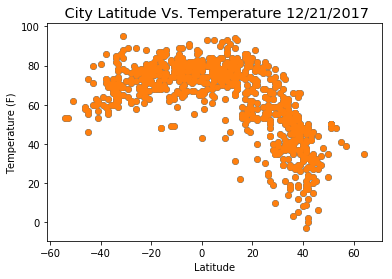

In [16]:
plt.show()

In [17]:
# plting lat and humidity
plt.scatter(cities_sample['latitude'], cities_sample['humidity'])
plt.title(f"City Latitude Vs. Humidity {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.style.use('ggplot')
plt.savefig("Humidity.png")

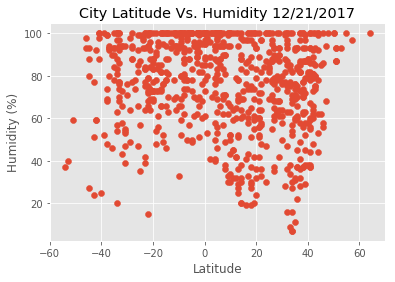

In [18]:
plt.show()

In [19]:
# plting lat and cloudiness 
plt.scatter(cities_sample['latitude'], cities_sample['cloudiness'])
plt.title(f"City Latitude Vs. Cloudiness {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.style.use('ggplot')
plt.savefig("Cloudiness.png")

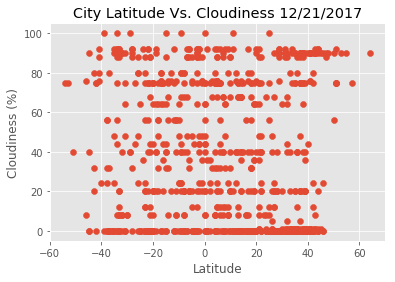

In [20]:
plt.show()

In [21]:
# plting lat and windspeed
plt.scatter(cities_sample['latitude'], cities_sample['wind_speed'])
plt.title(f"City Latitude Vs. Wend Speed {date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.style.use('ggplot')
plt.savefig("Wind_Speed.png")

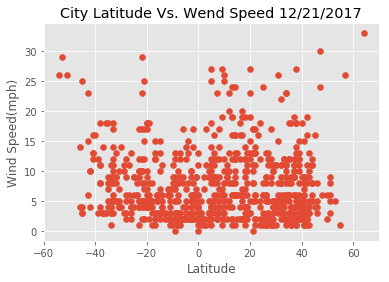

In [22]:
plt.show()

In [23]:
#save Analysis into CSV file:
cities_sample.to_csv("CitiesSample.csv", encoding="utf-8", index=False)
df = pd.read_csv("CitiesSample.csv")